# Import Modules 

In [315]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import sys
from matplotlib import cm

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from tqdm.auto import tqdm, trange
from IPython.display import display


sys.path.append('/mnt/d/OneDrive - Universidad Autonoma de San Luis Potosi - UASLP/Documentos/RUCO/SPMODULES/')
from Binning_Class import Binning, Image_Binning
import SpectraAnalisis as spa



# Experimental Notes 

In [317]:
f = open("/mnt/d/OneDrive - Universidad Autonoma de San Luis Potosi - UASLP/Documentos/RUCO/EXPERIMENTOS/InP/2020-07-12-uRD/Bitacora_2020-07-12.txt","r")
print(f.read())

Muestra : InP
NOTAs:-
     
 
Parametros Del Sistema  :    
Temperatura General     : 32K
Voltaje Lampara         : 24 V
Potencia Lampara        : 70W
Temperatura CCD         : -35C

Parametros de Medicion 

 Muestra  Exp  Pos      Nombre       Rango    Paso  Acumulacion  Exp. Time [s]     Slits         
   InP    RD    1       Exp001      600-680    0.1        10          0.35         250um        
   



# Draw Area to Binnging

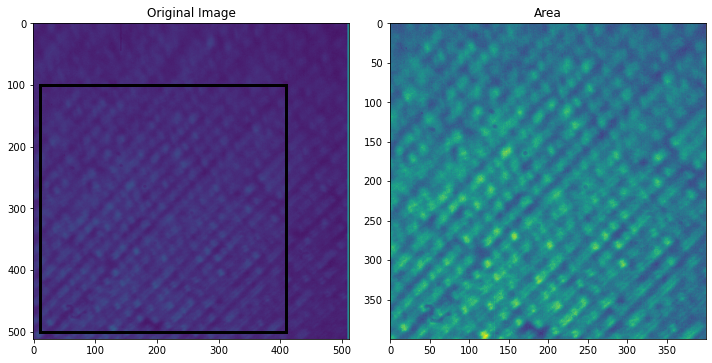

50.0
50.0


In [259]:
path01  = "/mnt/d/OneDrive - Universidad Autonoma de San Luis Potosi - UASLP/Documentos/RUCO/EXPERIMENTOS/InP/2020-07-11-uRD/Exp003/"


#Draw Area

xi = 10 ; xf = 400
yi = 100 ; yf = 400
binsize = 8

# Experimental parameters
li = 620 #initial Wavelength
lf = 661.2
wli = 652 # image with specific Wavlength
step = 0.1


ExpName    = "Exp003" 
Experiment = "R"

if Experiment == "DR/R" :
    lab = "div"
elif Experiment == "R":
    lab = "on"


analisis = Image_Binning(path01,ExpName+lab,binsize,xi,xf,yi,yf,wli,li,lf,step)
analisis.draw_area()
im = analisis.image0out

print(analisis.n/binsize)
print(analisis.m/binsize)


# Binning Process

In [261]:
rdbin =analisis.execute()

# Show Results

In [295]:
#%matplotlib inline
n = analisis.nb
m = analisis.mb

def map(xpix,ypix):
    fig  = plt.figure(figsize=(15, 9))
    spec = gridspec.GridSpec(ncols=2,nrows=1, width_ratios=[2,1])
    # Show image PR
    ax1=fig.add_subplot(spec[0])
    ax1.imshow(rdbin["array"],cmap=cm.viridis)
    ax1.plot([xpix],[ypix],marker = 's',color='w',markersize='10',markerfacecolor='none')
    ax1.axhline([ypix], ls = ':',color='w', lw=3)
    ax1.axvline([xpix], ls = ':',color='w', lw=3)
    ax1.set_title("%s Binning Size: %s"%(Experiment,binsize), fontsize=25)
    ax1.minorticks_on()
    #ax1.set_xticks(np.arange(0,n,20))
    #ax1.set_yticks(np.arange(0,n,20))
    ax1.tick_params(axis='both',which='minor',direction='out',length=5,width=1.25,labelsize=20)
    ax1.tick_params(axis='both',which='major',direction='out',length=8,width=1.25,labelsize=20)
    # Show plot point
    # Show Pr point
    
    ax2=fig.add_subplot(spec[1])
    ax2.plot(rdbin["cell"][xpix,ypix][:,0],rdbin["cell"][xpix,ypix][:,1],
             lw = 1,
             color = 'b',label = '%s CCD xpix:%s - ypix:%s'%(Experiment,xpix,ypix))
    ax2.set_xlabel('Wavelength [nm]',fontsize = 25)
    ax2.set_ylabel('CCD accounts',fontsize =25)
    #ax2.set_xlim([645,655])
    if Experiment == "R":
        ax2.set_ylim([rdbin["array"].min()-300,rdbin["array"].max()+1000])
    else:
        ax2.set_ylim([-12e-3,12e-3])
    ax2.minorticks_on()
    ax2.ticklabel_format(style='sci', axis='y')
    ax2.yaxis.offsetText.set_fontsize(15)
    ax2.tick_params(axis='both',which='minor',direction='in',length=5,width=1.25,labelsize=20)
    ax2.tick_params(axis='both',which='major',direction='in',length=8,width=1.25,labelsize=20)
    ax2.legend(fontsize=15,frameon=False,loc=2)
    #plt.autoscale(tight=True)
    fig.tight_layout()
    plt.show()
xx = widgets.IntSlider(min = 0, max=m-1, step=1,layout={'width': '500px'}, continuous_update=False)
yy = widgets.IntSlider(min = 0, max=n-1, step=1,layout={'width': '500px'}, continuous_update=False)
interact(map,xpix = xx, ypix = yy)

interactive(children=(IntSlider(value=0, continuous_update=False, description='xpix', layout=Layout(width='500…

<function __main__.map(xpix, ypix)>

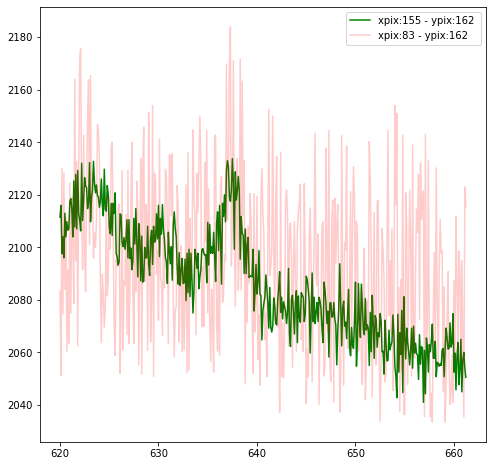

In [180]:
#smooth spectra
xpix = xx.value
ypix = yy.value
dat = rdbin["cell"][xpix,ypix]
bdat = rdbin["cell"][93,162]

sme = spa.smooth(dat,10)
RDwP = np.loadtxt("/mnt/d/OneDrive - Universidad Autonoma de San Luis Potosi - UASLP/Documentos/RUCO/ANALISIS/InP/RDwPT.txt",delimiter=',')
#28,71

fig2, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
ax.plot(dat[:,0],dat[:,1]+150,'g',label = "xpix:%s - ypix:%s "%(xpix,ypix))
ax.plot(bdat[:,0],bdat[:,1],'r',label = "xpix:%s - ypix:%s "%(83,162),alpha=0.2)
#ax.plot(sme[:,0],sme[:,1]+0.09e3,'b',alpha=0.5,label = "Smooth")

#ax.plot(1239.4/RDwP[:,0],RDwP[:,2]*20+2.2,'b',label = "xpix:%s - ypix:%s "%(xpix,ypix))
#ax.set_xlim([600,680])
ax.legend()
plt.show()

# Create Animation

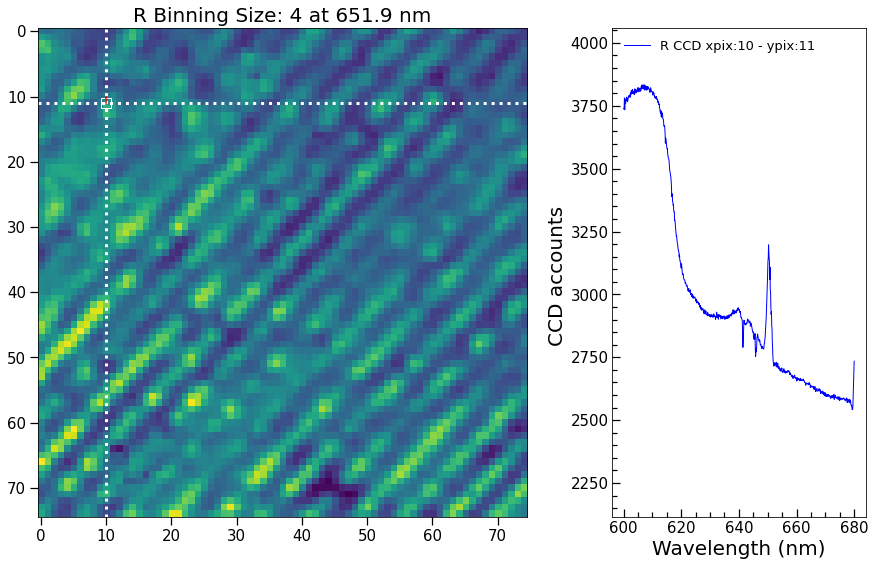

In [67]:
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

import matplotlib.animation


fig2  = plt.figure(figsize=(15,9))
spec2 = gridspec.GridSpec(ncols=2,nrows=1, width_ratios=[2,1])
ax01  = fig2.add_subplot(spec2[0])
ax02  = fig2.add_subplot(spec2[1])

def anim(xpix,ypix,start):
    # Show image PR
    ax01.clear()
    ax01.imshow(rdbin["array"],cmap=cm.viridis)
    ax01.plot([xpix],[ypix],marker = 's',color='w',markersize='10',markerfacecolor='none')
    ax01.axhline([ypix], ls = ':',color='w', lw=3)
    ax01.axvline([xpix], ls = ':',color='w', lw=3)
    ax01.plot([start,xpix],[start,ypix],'r')
    ax01.tick_params(axis='both',which='minor',direction='out',length=5,width=1.25,labelsize=15)
    ax01.tick_params(axis='both',which='major',direction='out',length=8,width=1.25,labelsize=15)
    # Show plot point
    ax01.set_title("%s Binning Size: %s at %.1f nm"%(Experiment,binsize,wli), fontsize=20)
    
    ax02.clear()   
    ax02.plot(rdbin["cell"][xpix,ypix][:,0],rdbin["cell"][xpix,ypix][:,1],
                lw = 1,
                color = 'b',
                label = '%s CCD xpix:%s - ypix:%s'%(Experiment,xpix,ypix))
    ax02.set_xlabel('Wavelength (nm)',fontsize = 20)
    ax02.set_ylabel('CCD accounts ',fontsize = 20)
    
    if Experiment == "R":
        ax02.set_ylim([rdbin["array"].min()-300,rdbin["array"].max()+1000])
    else:
        ax02.set_ylim([-12e-3,12e-3])
        
    ax02.minorticks_on()
    ax02.ticklabel_format(style='sci', axis='y')
    ax02.yaxis.offsetText.set_fontsize(15)
    ax02.tick_params(axis='both',which='minor',direction='in',length=5,width=1.25,labelsize=15)
    ax02.tick_params(axis='both',which='major',direction='in',length=8,width=1.25,labelsize=15)
    ax02.legend(fontsize=13,loc=2,frameon =False)
    
  

# Function to evaluate frames
def animate(frame):
    
    return anim(frame,frame+1,10)    



# def update(*args):
#     cont=10
#     ffs = []
#     for i in range(40,10,-1):
#         ffs.append([anim(cont,i,cont)])
#     return ffs



# Init only required for blitting to give a clean slate.
      
ani = matplotlib.animation.FuncAnimation(fig2, animate, frames=np.arange(10,40,1))

    
plt.show()

# Export Animation

In [59]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='RUCO'), bitrate=1800)
ani.save('CCD_DR-2020-07-12.mp4', writer=writer)

In [313]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='RUCO'), bitrate=1800)
ani.save('CCD4.mp4', writer=writer)

In [258]:
ani.save('CCD.gif', writer='imagemagick', fps=5)